In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)


2.5.0


# Dataset Creation

In [2]:
from sklearn.datasets import make_circles, make_classification
#X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
X, y = make_classification(n_samples=1000, n_features=120, scale=2, random_state=42)
# split into train and test
n_train = 900
X_train, X_test = X[:n_train, :], X[n_train:, :]
y_train, y_test = y[:n_train], y[n_train:]

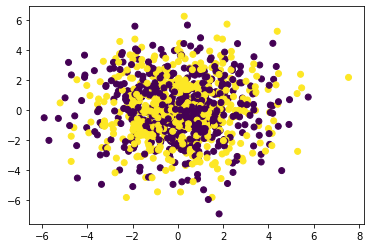

In [3]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)

# Baseline Model

Verifique algumas técnicas de regularização:

- Dropout: https://keras.io/api/layers/regularization_layers/dropout/

- Norma L1, L2: https://keras.io/api/layers/regularizers/

- Early Stopping:  https://keras.io/api/callbacks/early_stopping/

In [4]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_dim=120),
    layers.Dense(256, activation='relu'),
    layers.Dense(1, activation='sigmoid'),    
])


## Simpler Model

In [ ]:
model = keras.Sequential([
    layers.Dense(8, activation='relu', input_dim=120),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid'),    
])

## Dropout Example

Documentation: https://keras.io/api/layers/regularization_layers/dropout/

In [ ]:
model = keras.Sequential([
    layers.Dense(8, activation='relu', input_dim=120),
    layers.Dropout(0.5),
    layers.Dense(4, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid'),    
])


## L1 Regularizer

Documentation: https://keras.io/api/layers/regularizers/

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(512, activation='relu', kernel_regularizer='l1', input_dim=120),
    layers.Dense(256, kernel_regularizer='l1', activation='relu'),
    layers.Dense(1, activation='sigmoid'),    
])

## L2 Regularizer

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(512, activation='relu', kernel_regularizer='l2', input_dim=120),
    layers.Dense(256, kernel_regularizer='l2', activation='relu'),
    layers.Dense(1, activation='sigmoid'),    
])

## Dropout + L1, L2 Regularizer Example

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(512, activation='relu', kernel_regularizer='l1', input_dim=120),
    layers.Dropout(0.5),
    layers.Dense(256, kernel_regularizer='l1', activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid'),    
])

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(512, activation='relu', kernel_regularizer='l2', input_dim=120),
    layers.Dropout(0.5),
    layers.Dense(256, kernel_regularizer='l2', activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid'),    
])

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), input_dim=120),
    layers.Dropout(0.5),
    layers.Dense(256, kernel_regularizer='l2', activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid'),    
])

# Training Process

In [5]:
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               61952     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 193,537
Trainable params: 193,537
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
29/29 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5867 - val_loss: 0.6366 - val_accuracy: 0.6400
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: 0.5283 - accuracy: 0.7422 - val_loss: 0.5239 - val_accuracy: 0.7300
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 0.4349 - accuracy: 0.8233 - val_loss: 0.5182 - val_accuracy: 0.7300
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 0.3839 - accuracy: 0.8544 - val_loss: 0.4630 - val_accuracy: 0.8100
Epoch 5/100
29/29 [==============================] - 0s 2ms/step - loss: 0.3360 - accuracy: 0.8811 - val_loss: 0.4484 - val_accuracy: 0.7900
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 0.3047 - accuracy: 0.8922 - val_loss: 0.4401 - val_accuracy: 0.8000
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 0.2796 - accuracy: 0.8989 - val_loss: 0.4329 - val_accuracy: 0.8000
Epoch 8/100
2

Epoch 59/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0138 - accuracy: 1.0000 - val_loss: 0.5680 - val_accuracy: 0.8000
Epoch 60/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 0.5701 - val_accuracy: 0.8000
Epoch 61/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0129 - accuracy: 1.0000 - val_loss: 0.5727 - val_accuracy: 0.8000
Epoch 62/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 0.5750 - val_accuracy: 0.8000
Epoch 63/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.5777 - val_accuracy: 0.8000
Epoch 64/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.5783 - val_accuracy: 0.8000
Epoch 65/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 0.5783 - val_accuracy: 0.8000
Epoch 

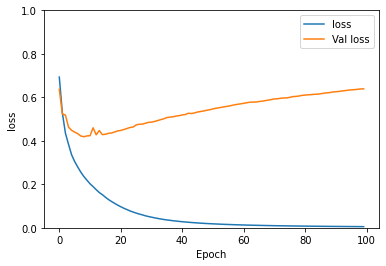

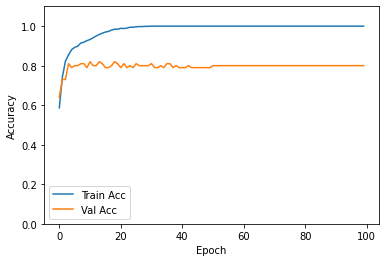

In [11]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'],
           label='loss')
    plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val loss')
    plt.ylim([0,1])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'],
           label='Train Acc')
    plt.plot(hist['epoch'], hist['val_accuracy'],
           label = 'Val Acc')
    plt.ylim([0,1.1])
    plt.legend()
    plt.show()


plot_history(history)


## Early Stopping

Documentation: https://keras.io/api/callbacks/early_stopping/

In [ ]:
# Example: https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/
from keras.callbacks import EarlyStopping

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', patience=2, verbose=1)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[es], epochs=100)

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'],
           label='loss')
    plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val loss')
    plt.ylim([0,10])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'],
           label='Train Acc')
    plt.plot(hist['epoch'], hist['val_accuracy'],
           label = 'Val Acc')
    plt.ylim([0,1])
    plt.legend()
    plt.show()


plot_history(history)
